# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Unsupervised - Raw Data
### KMeans

In [3]:
### KMeans
from Models import KMeansModel

ml_quic.add_model(KMeansModel.KMeansModel(), model_name='KMeans', data_type='raw', tag = 'Unsupervised')

### Spectral Clustering

In [4]:
### Spectral Clustering
from Models import SpectralClustering

ml_quic.add_model(SpectralClustering.SpectralClustering(n_vars=8), model_name='Spectral', data_type='raw', tag = 'Unsupervised')

### Train and Compare Unsupervised Models

KMeans:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7991
         pos       0.93      0.47      0.63      1273

    accuracy                           0.92      9264
   macro avg       0.93      0.73      0.79      9264
weighted avg       0.92      0.92      0.91      9264

Spectral:
              precision    recall  f1-score   support

         neg       1.00      0.68      0.81      7991
         pos       0.33      0.99      0.49      1273

    accuracy                           0.72      9264
   macro avg       0.66      0.83      0.65      9264
weighted avg       0.91      0.72      0.76      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.8302583025830258
False Positives Account for 6.42% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 21.63586956521739
Average RAF: 0.05930461347826086
Average MPR: 18.769215863478262
Average MS: 1713.

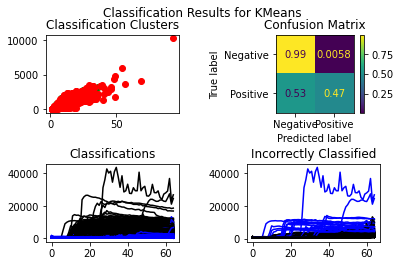

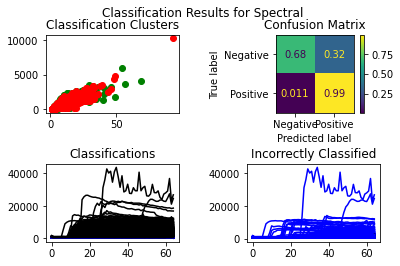

In [5]:
### Get Unsupervised Scores and Plots
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

## Supervised - Raw Data

### Multilayer Perceptron

In [6]:
### MLP
from Models import MLP as MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [7]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [8]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

29/29 [==============================] - 0s 1ms/step
MLP:
              precision    recall  f1-score   support

         neg       0.99      0.96      0.97       796
         pos       0.80      0.92      0.86       130

    accuracy                           0.96       926
   macro avg       0.89      0.94      0.92       926
weighted avg       0.96      0.96      0.96       926

SVM:
              precision    recall  f1-score   support

         neg       0.98      0.96      0.97       796
         pos       0.80      0.89      0.84       130

    accuracy                           0.95       926
   macro avg       0.89      0.93      0.91       926
weighted avg       0.96      0.95      0.95       926

-------- Results on False Positives for MLP --------
29/29 [==============================] - 0s 1ms/step
Accuracy on False Positives: 0.19444444444444445
False Positives Account for 72.50% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 37.

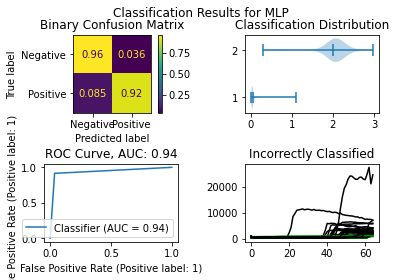

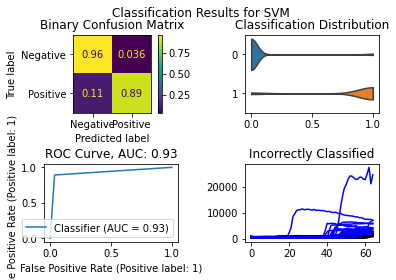

In [9]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Unsupervised - Analysis

### Create New Object

In [10]:
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [11]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')

[{'KMeans': array([8557, 4308, 9223, ..., 8104, 4200, 3329])},
 {'KMeans': array([8129, 5248, 4675, ..., 1259, 5769, 6704])}]

### Add Spectral Clustering

In [12]:
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_vars=2), model_name='Spectral', data_type='analysis', tag = 'Unsupervised')

### Train and Compare Unsupervised Models

In [15]:
### Get Unsupervised Scores and Plots
ml_quic.separate_train_test(tags = ['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

KMeans:
              precision    recall  f1-score   support

         neg       0.94      0.99      0.96      7991
         pos       0.87      0.59      0.70      1273

    accuracy                           0.93      9264
   macro avg       0.90      0.79      0.83      9264
weighted avg       0.93      0.93      0.93      9264



ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

### Add Supervised Learning Technique (SVM)

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'analysis', tag = 'Supervised')

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       802
         pos       0.83      0.95      0.88       124

    accuracy                           0.97       926
   macro avg       0.91      0.96      0.93       926
weighted avg       0.97      0.97      0.97       926

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.16666666666666666
False Positives Account for 80.65% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.45
Average RAF: 0.03281541964
Average MPR: 9.46309607044
Average MS: 835.31
Correctly Classified FP Characteristics:
Average Time to Threshold: 34.8
Average RAF: 0.0437410678
Average MPR: 7.5822832714
Average MS: 145.55
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222
MPR:
	Min: 1.2419186

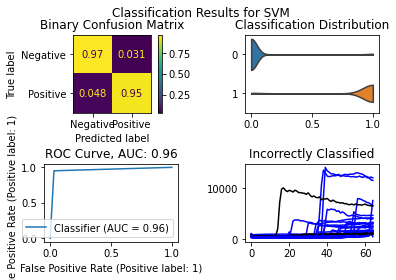

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])